## Importing & exploration

In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font",size=14)
from sklearn.linear_model import LogisticRegression

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid",color_codes=True)

In [11]:
data=pd.read_csv('gdrive/My Drive/link4ff.csv')


In [12]:
list(data.columns)

['Liczba klikniec',
 'Liczba wyswietlen',
 'Check_conversion',
 'Path_Lenght',
 'Check_SEM_Engaged',
 'Check_BeforeToLast_for_SEM',
 'SEM_ends_path',
 'Check_BeforeToLast_for_RTB',
 'Check_Affiliate_Engaged',
 'Check_BeforeToLast_for_Affiliate',
 'Affiliate_ends_path']

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149674 entries, 0 to 149673
Data columns (total 11 columns):
 #   Column                            Non-Null Count   Dtype
---  ------                            --------------   -----
 0   Liczba klikniec                   149674 non-null  int64
 1   Liczba wyswietlen                 149674 non-null  int64
 2   Check_conversion                  149674 non-null  int64
 3   Path_Lenght                       149674 non-null  int64
 4   Check_SEM_Engaged                 149674 non-null  int64
 5   Check_BeforeToLast_for_SEM        149674 non-null  int64
 6   SEM_ends_path                     149674 non-null  int64
 7   Check_BeforeToLast_for_RTB        149674 non-null  int64
 8   Check_Affiliate_Engaged           149674 non-null  int64
 9   Check_BeforeToLast_for_Affiliate  149674 non-null  int64
 10  Affiliate_ends_path               149674 non-null  int64
dtypes: int64(11)
memory usage: 12.6 MB


In [14]:
data.shape

(149674, 11)

In [15]:
data.head(10)

,Liczba klikniec,Liczba wyswietlen,Check_conversion,Path_Lenght,Check_SEM_Engaged,Check_BeforeToLast_for_SEM,SEM_ends_path,Check_BeforeToLast_for_RTB,Check_Affiliate_Engaged,Check_BeforeToLast_for_Affiliate,Affiliate_ends_path
0,5,0,1,5,0,0,0,0,1,0,1
1,33,0,1,33,0,0,0,0,1,0,1
2,1,0,1,1,0,1,0,0,0,0,0
3,1,0,1,1,0,1,0,0,0,0,0
4,1,0,1,1,0,0,0,0,0,0,0
5,1,0,1,1,0,0,0,0,0,0,0
6,21,1,1,22,0,0,0,0,1,0,1
7,100,100,1,200,0,0,0,0,0,0,1
8,91,0,1,91,0,0,0,0,1,0,1
9,2,0,1,2,0,0,0,1,1,0,1


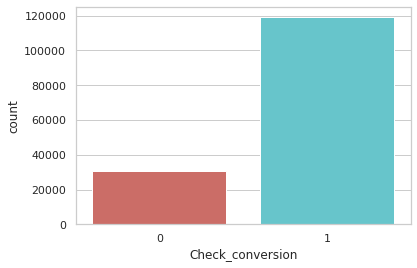

<Figure size 432x288 with 0 Axes>

In [16]:
sns.countplot(x='Check_conversion',data=data,palette='hls')
plt.show()
plt.savefig('count_plot')

##Feature Selection

In [17]:
categorical_variable_cols = ['Liczba klikniec',
 'Liczba wyswietlen',
 'Path_Lenght',
 'Check_Affiliate_Engaged',
 'Check_BeforeToLast_for_Affiliate',
 'Affiliate_ends_path']


for var in categorical_variable_cols:
    categ_list = 'var_' + var
    categ_list = pd.get_dummies(data[var],prefix = var)
    data1=data.join(categ_list)
    data = data1


data_vars = data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in categorical_variable_cols]

In [18]:
data_final = data[to_keep]
data_final.columns.values

array(['Check_conversion', 'Check_SEM_Engaged',
       'Check_BeforeToLast_for_SEM', 'SEM_ends_path',
       'Check_BeforeToLast_for_RTB', 'Liczba klikniec_0',
       'Liczba klikniec_1', 'Liczba klikniec_2', 'Liczba klikniec_3',
       'Liczba klikniec_4', 'Liczba klikniec_5', 'Liczba klikniec_6',
       'Liczba klikniec_7', 'Liczba klikniec_8', 'Liczba klikniec_9',
       'Liczba klikniec_10', 'Liczba klikniec_11', 'Liczba klikniec_12',
       'Liczba klikniec_13', 'Liczba klikniec_14', 'Liczba klikniec_15',
       'Liczba klikniec_16', 'Liczba klikniec_17', 'Liczba klikniec_18',
       'Liczba klikniec_19', 'Liczba klikniec_20', 'Liczba klikniec_21',
       'Liczba klikniec_22', 'Liczba klikniec_23', 'Liczba klikniec_24',
       'Liczba klikniec_25', 'Liczba klikniec_26', 'Liczba klikniec_27',
       'Liczba klikniec_28', 'Liczba klikniec_29', 'Liczba klikniec_30',
       'Liczba klikniec_31', 'Liczba klikniec_32', 'Liczba klikniec_33',
       'Liczba klikniec_34', 'Liczba klikniec_

In [19]:
data_final_vars = data_final.columns.values.tolist()
y=['Check_conversion']
X = [i for i in data_final_vars if i not in y]

In [23]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, step = 18)

rfe = rfe.fit(data[X],data[y].values.ravel())

Selected_Features_Support = list(rfe.support_)
Selected_Features_rank = list(rfe.ranking_)

print(Selected_Features_Support)
print(Selected_Features_rank)

[False, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, False, True, True, True, False, False, False, True, False, False, False, True, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False

In [24]:
columns_final = ['Liczba klikniec',
 'Liczba wyswietlen',
 'Path_Lenght',
 'Check_Affiliate_Engaged',
 'Check_BeforeToLast_for_Affiliate',
 'Affiliate_ends_path'] 

X = data[columns_final]
y = data['Check_conversion']

##Model Implementation

In [25]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

LogisticRegression()

In [27]:
y_pred = logreg.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:2f}'.format(logreg.score(X_test,y_test)))

Accuracy of logistic regression classifier on test set: 0.742578


## Cross Validation

In [28]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits = 10, random_state = 7, shuffle=True)

modelCV = LogisticRegression()

scoring = 'accuracy'

results = model_selection.cross_val_score(modelCV, X_train,y_train, cv = kfold, scoring = scoring)

print("10-fold cross-validation average accuracy : %.3f" % (results.mean()))

10-fold cross-validation average accuracy : 0.746


##Confusion Matrix and classification report

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[    0  9200]
 [ 2359 33344]]


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      9200
           1       0.78      0.93      0.85     35703

    accuracy                           0.74     44903
   macro avg       0.39      0.47      0.43     44903
weighted avg       0.62      0.74      0.68     44903

